In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#plt.rcParams['axes.grid'] = True
plt.style.context('Solarize_Light2')

roots = [0.3018336135076354, 0.7883671029813581, 0.9723445185469877, 1.2390777517571931, 1.6410179299284857, 1.9728374883141215, 2.2691853142129728, 2.8007227202811613]
ms = [0.0004, 0.0625, 0.125, 0.25, 0.5, 0.75, 1.0, 1.5]
get_crit_T = dict(zip(ms, roots))
num_temps = 100
num_epochs = 3

In [2]:
def errs(errs):
    return np.array([sum(errs[i*512:(i+1)*512])/512 for i in range(num_temps)])

def stds_err(errs):
    return np.array([np.std(errs[i*512:(i+1)*512]) for i in range(num_temps)])

$\mathcal{H}=-\sum\limits_{x,y=1}^{L}\left[J_1\sigma_{x,y}\cdot\sigma_{x+1,y}+J_2\sigma_{x,y}\cdot\sigma_{x,y+1}\right]$
 \
 \
$M = \dfrac{J_2}{J_1}$, $J_1 = 1.0$, $J_2 \in [0.25, 0.5, 0.75, 1.0]$ \
\
Точное решение: \
\
$\sinh{\dfrac{2J_1}{kT_c}}\cdot\sinh{\dfrac{2J_2}{kT_c}}=1$

In [3]:
ts_diff = {}
ts_diff['min'] = []
ts_diff['max'] = []
ts_diff['mean'] = []
ts_diff['T_c'] = []
ts_diff['diff'] = []
ts_diff['ts'] = {M: [] for M in [0.0625, 0.125, 0.25, 0.5, 0.75, 1.0]}

In [4]:
M = 0.0004
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
#epochs = opt_epochs[Jd]

#epochs = [5] * 4

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].errorbar(T, errs(errs_[i]), yerr=stds_err(errs_[i])/1000, marker='.', label=f'L={L}', c=f'C{i+1}')
    #ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data_errors/rectangular/0.0004_100_100_3_epochs.npy'

min 0.8095792241934794
max 0.8277610423752977
mean 0.8186701332843885
T_c 0.7883671029813581
diff 0.030303030303030387


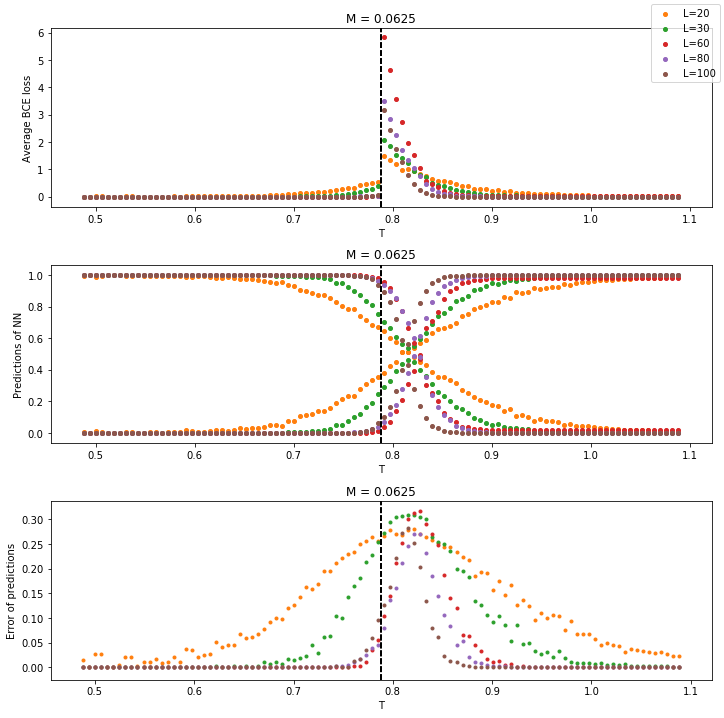

In [4]:
M = 0.0625
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

print('min', np.min(ts))
print('max', np.max(ts))
print('mean', (np.max(ts) + np.min(ts))/ 2)
print('T_c', T_c)
print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

ts_diff['min'].append(np.min(ts))
ts_diff['max'].append(np.max(ts))
ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
ts_diff['T_c'].append(T_c)
ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)
ts_diff['ts'][M] = ts

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    #ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='.', c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}.png')

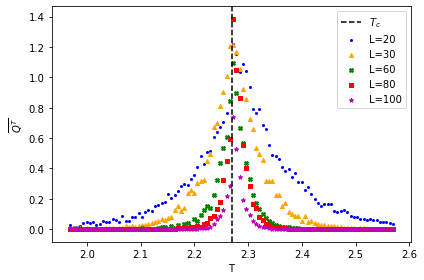

In [59]:
markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

for i, L in enumerate(Ls):
    plt.scatter(T, errs(errs_[i]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    # ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='.', c=f'C{i+1}')


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    # ax[2].set_ylabel('Error of predictions')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.setp(ax, title=f'M = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}-BCE.png')

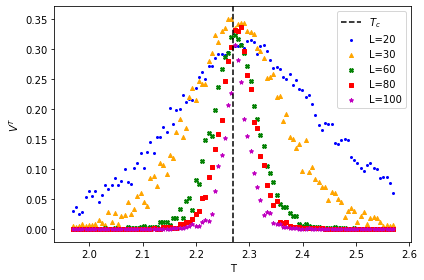

In [60]:
markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

for i, L in enumerate(Ls):
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    # ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    # ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$V^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.setp(ax, title=f'M = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}-variance.png')

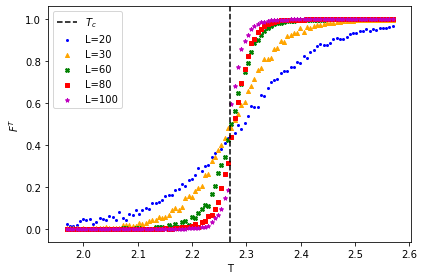

In [61]:
markers=['.', '^', 'X', 's', '*']
colors=['blue', 'orange', 'green', 'red', 'm']

for i, L in enumerate(Ls):
    # plt.scatter(T, errs(errs_[i]), marker=markers[i], s=16, label=f'L={L}', c=colors[i])
    plt.scatter(T, errs(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i], s=16)
    #plt.scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    # plt.scatter(T, stds_err(outs_[i][:, 0]), marker=markers[i], label=f'L={L}', c=colors[i])


    # ax[1].axvline(x=T_c, color='black', linestyle='--')
    # ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.xlabel('T')
    # plt.ylabel('$\overline{Q^T}$')
    # ax[1].set_ylabel('Predictions of NN')
    plt.ylabel('$F^T$')
    
plt.axvline(x=T_c, color='black', linestyle='--', label='$T_c$')
plt.setp(ax, title=f'M = {M}')
plt.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}-pred.png')

min 0.9874960336985028
max 0.999617245819715
mean 0.9935566397591089
T_c 0.9723445185469877
diff 0.021212121212121238


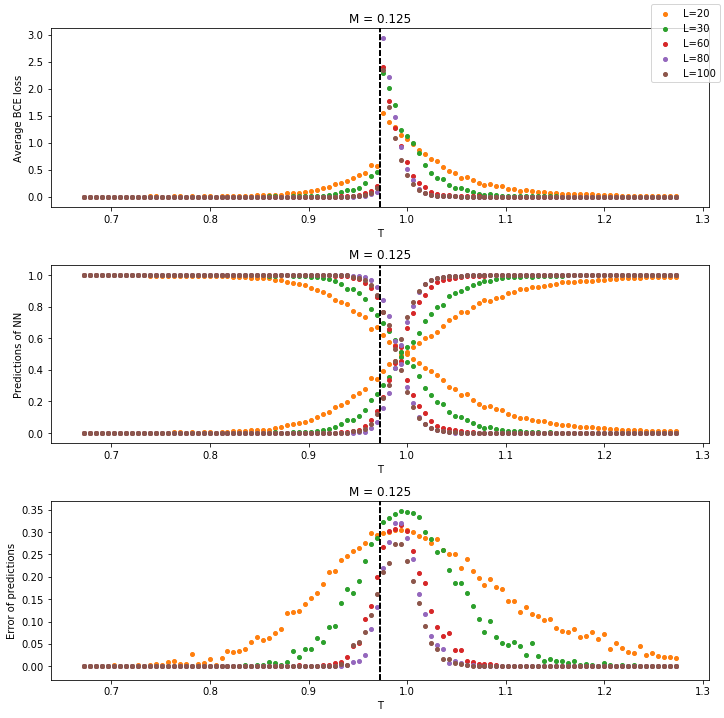

In [5]:
M = 0.125
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

print('min', np.min(ts))
print('max', np.max(ts))
print('mean', (np.max(ts) + np.min(ts))/ 2)
print('T_c', T_c)
print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

ts_diff['min'].append(np.min(ts))
ts_diff['max'].append(np.max(ts))
ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
ts_diff['T_c'].append(T_c)
ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)
ts_diff['ts'][M] = ts

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}.png')

min 1.2481686608481022
max 1.2602898729693144
mean 1.2542292669087083
T_c 1.2390777517571931
diff 0.015151515151515138


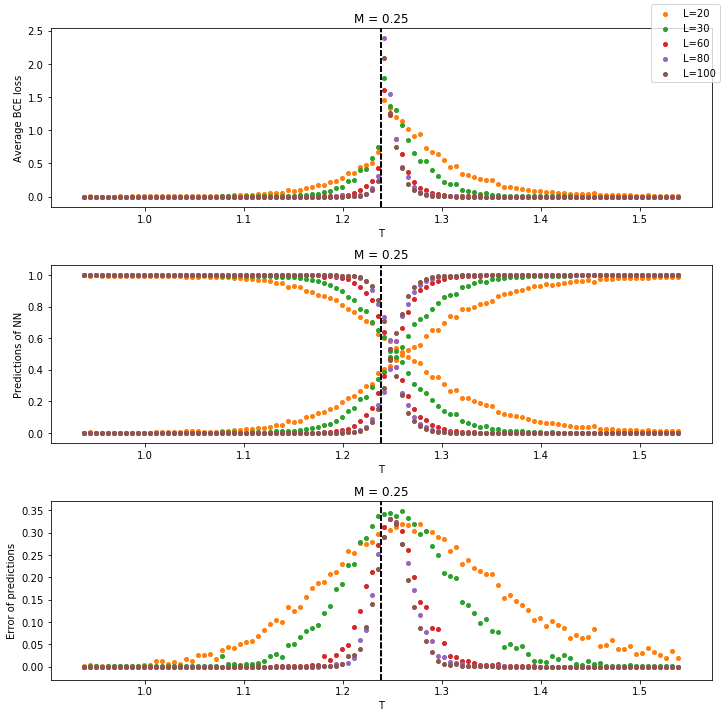

In [6]:
M = 0.25
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

print('min', np.min(ts))
print('max', np.max(ts))
print('mean', (np.max(ts) + np.min(ts))/ 2)
print('T_c', T_c)
print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

ts_diff['min'].append(np.min(ts))
ts_diff['max'].append(np.max(ts))
ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
ts_diff['T_c'].append(T_c)
ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)
ts_diff['ts'][M] = ts

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}.png')

min 1.6440482329587889
max 1.662230051140607
mean 1.653139142049698
T_c 1.6410179299284857
diff 0.0121212121212122


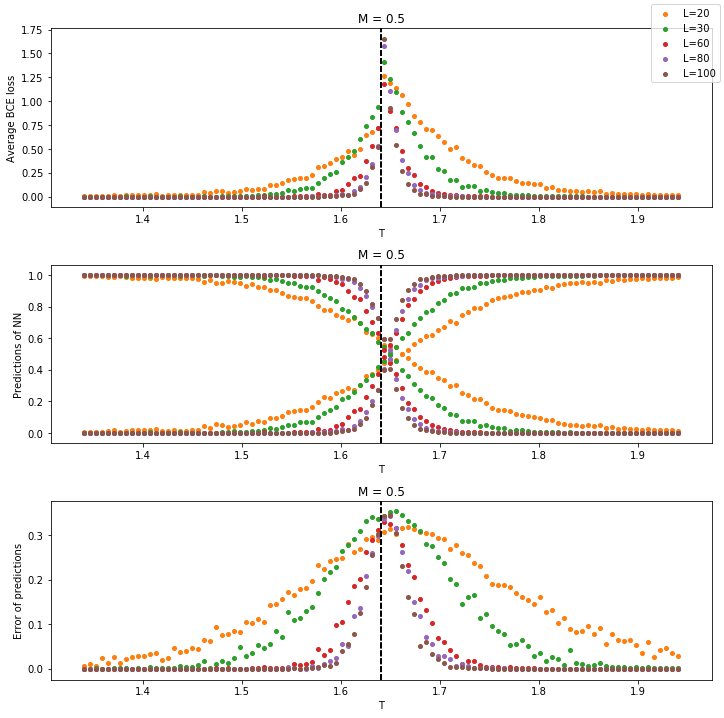

In [7]:
M = 0.5
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

print('min', np.min(ts))
print('max', np.max(ts))
print('mean', (np.max(ts) + np.min(ts))/ 2)
print('T_c', T_c)
print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

ts_diff['min'].append(np.min(ts))
ts_diff['max'].append(np.max(ts))
ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
ts_diff['T_c'].append(T_c)
ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)
ts_diff['ts'][M] = ts

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}.png')

min 1.9758677913444247
max 1.9940496095262428
mean 1.9849587004353337
T_c 1.9728374883141215
diff 0.0121212121212122


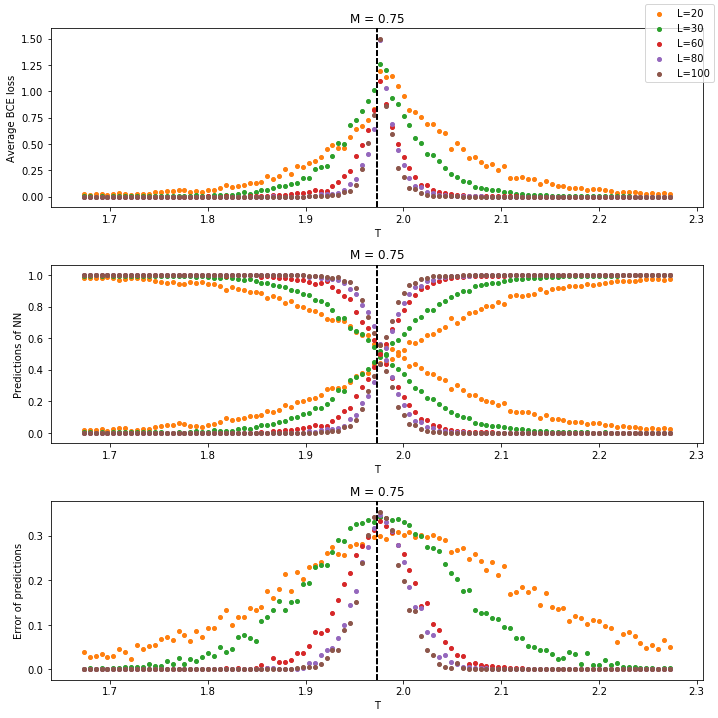

In [8]:
M = 0.75
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

print('min', np.min(ts))
print('max', np.max(ts))
print('mean', (np.max(ts) + np.min(ts))/ 2)
print('T_c', T_c)
print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

ts_diff['min'].append(np.min(ts))
ts_diff['max'].append(np.max(ts))
ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
ts_diff['T_c'].append(T_c)
ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)
ts_diff['ts'][M] = ts

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}.png')

min 2.2722156172432757
max 2.284336829364488
mean 2.278276223303882
T_c 2.2691853142129728
diff 0.00909090909090926


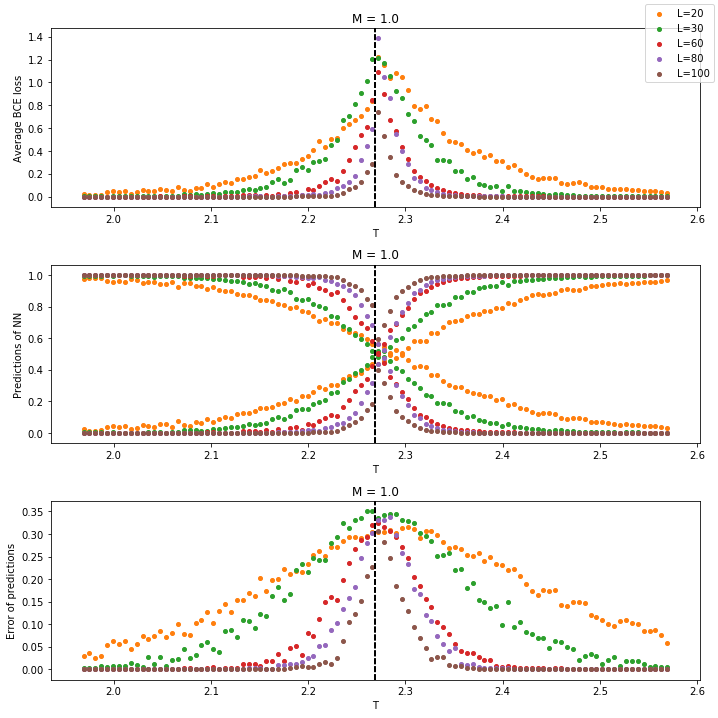

In [9]:
M = 1.0
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

print('min', np.min(ts))
print('max', np.max(ts))
print('mean', (np.max(ts) + np.min(ts))/ 2)
print('T_c', T_c)
print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

ts_diff['min'].append(np.min(ts))
ts_diff['max'].append(np.max(ts))
ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
ts_diff['T_c'].append(T_c)
ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)
ts_diff['ts'][M] = ts

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
#plt.show()
plt.savefig(f'images/m-{M}.png')

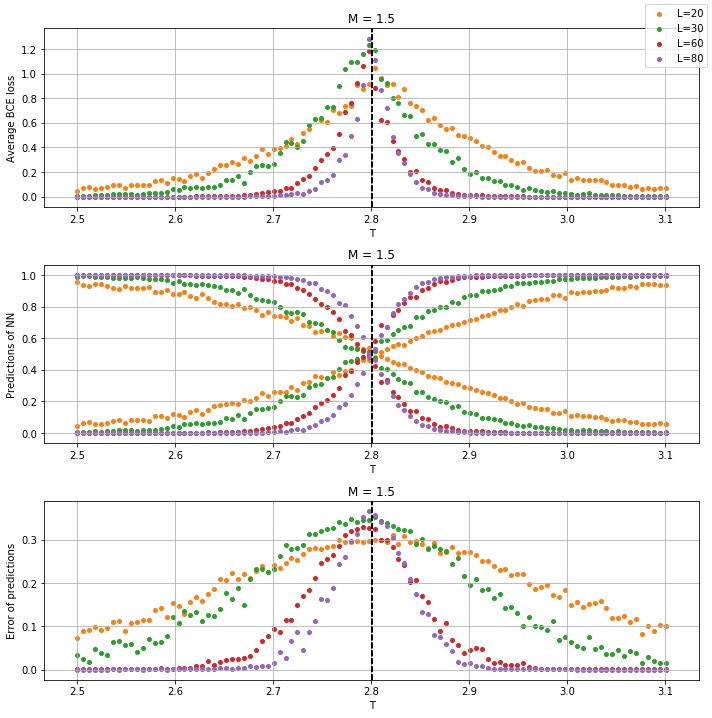

In [120]:
M = 1.5
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

errs_ = []
outs_ = []
Ls = [20, 30, 60, 80, 100]
#epochs = [3] * len(Ls)

num_epochs = 5
for i, L in enumerate(Ls):
    #num_epochs = epochs[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

        
ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)

# print('min', np.min(ts))
# print('max', np.max(ts))
# print('mean', (np.max(ts) + np.min(ts))/ 2)
# print('T_c', T_c)
# print('diff', (np.max(ts) + np.min(ts))/ 2 - T_c)

# ts_diff['min'].append(np.min(ts))
# ts_diff['max'].append(np.max(ts))
# ts_diff['mean'].append((np.max(ts) + np.min(ts))/ 2)
# ts_diff['T_c'].append(T_c)
# ts_diff['diff'].append((np.max(ts) + np.min(ts))/ 2 - T_c)

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].scatter(T, errs(errs_[i]), marker='o', s=16, label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 0]), marker='.', c=f'C{i+1}')
    #ax[1].plot(T, errs(outs_[i][:, 1]), marker='.', c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()
#plt.savefig(f'images/m-{M}.png')

In [121]:
'''M = 1.0
T_c = get_crit_T[M]
T = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)

#opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()
#epochs = opt_epochs[Jd]

Ls = [20, 30, 60, 80, 120]
epochs = [1] * len(Ls)

errs_ = []
outs_ = []
min_bce_epoch = [1] * len(Ls)
min_bce = [10000] * len(Ls)


for epoch in range(1, 31):
    errs_ = []
    outs_ = []
    for i, L in enumerate(Ls):
        num_epochs = epoch
        with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
            errs_.append(np.load(f)) 
        with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
            outs_.append(np.squeeze(np.load(f)))
        if sum(errs(errs_[i])[T>0]) < min_bce[i]:
            min_bce_epoch[i] = num_epochs
            min_bce[i] = sum(errs(errs_[i])[T>0])
            
errs_ = []
outs_ = []
min_bce_epoch = [4] * len(Ls)
for i, L in enumerate(Ls):
    num_epochs = min_bce_epoch[i]
    with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        errs_.append(np.load(f)) 
    with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:
        outs_.append(np.squeeze(np.load(f)))

ts = []
for i, L in enumerate(Ls):
    diff = [np.abs(errs(outs_[i][:, 0])[j] - errs(outs_[i][:, 1]))[j] for j in range(num_temps)]
    ts.append(T[np.argmin(diff)])
ts = np.array(ts)
print(np.abs(T_c - ts.mean()))

fig, ax = plt.subplots(3, 1, figsize=(10,10))

for i, L in enumerate(Ls):
    ax[0].errorbar(T, errs(errs_[i]), yerr=stds_err(errs_[i])/1000, marker='.', label=f'L={L}', c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')
    ax[1].scatter(T, errs(outs_[i][:, 1]), marker='o', s=16, c=f'C{i+1}')
    ax[2].scatter(T, stds_err(outs_[i][:, 0]), marker='o', s=16, c=f'C{i+1}')


    ax[0].axvline(x=T_c, color='black', linestyle='--')
    ax[1].axvline(x=T_c, color='black', linestyle='--')
    ax[2].axvline(x=T_c, color='black', linestyle='--')

    plt.setp(ax, xlabel='T')
    ax[0].set_ylabel('Average BCE loss')
    ax[1].set_ylabel('Predictions of NN')
    ax[2].set_ylabel('Error of predictions')

plt.setp(ax, title=f'M = {M}')
fig.legend()
plt.tight_layout()
#plt.xlim(T_c-0.1, T_c+0.1)
plt.show()'''

"M = 1.0\nT_c = get_crit_T[M]\nT = np.linspace(T_c - 0.3, T_c + 0.3, num_temps)\n\n#opt_epochs = np.load('opt_epochs.npy', allow_pickle='TRUE').item()\n#epochs = opt_epochs[Jd]\n\nLs = [20, 30, 60, 80, 120]\nepochs = [1] * len(Ls)\n\nerrs_ = []\nouts_ = []\nmin_bce_epoch = [1] * len(Ls)\nmin_bce = [10000] * len(Ls)\n\n\nfor epoch in range(1, 31):\n    errs_ = []\n    outs_ = []\n    for i, L in enumerate(Ls):\n        num_epochs = epoch\n        with open(f'data_errors/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:\n            errs_.append(np.load(f)) \n        with open(f'data_outputs/rectangular/{M}_{L}_{num_temps}_{num_epochs}_epochs.npy', 'rb') as f:\n            outs_.append(np.squeeze(np.load(f)))\n        if sum(errs(errs_[i])[T>0]) < min_bce[i]:\n            min_bce_epoch[i] = num_epochs\n            min_bce[i] = sum(errs(errs_[i])[T>0])\n            \nerrs_ = []\nouts_ = []\nmin_bce_epoch = [4] * len(Ls)\nfor i, L in enumerate(Ls):\n    num_epochs = min

In [10]:
ts_diff

{'min': [0.8095792241934794,
  0.9874960336985028,
  1.2481686608481022,
  1.6440482329587889,
  1.9758677913444247,
  2.2722156172432757],
 'max': [0.8277610423752977,
  0.999617245819715,
  1.2602898729693144,
  1.662230051140607,
  1.9940496095262428,
  2.284336829364488],
 'mean': [0.8186701332843885,
  0.9935566397591089,
  1.2542292669087083,
  1.653139142049698,
  1.9849587004353337,
  2.278276223303882],
 'T_c': [0.7883671029813581,
  0.9723445185469877,
  1.2390777517571931,
  1.6410179299284857,
  1.9728374883141215,
  2.2691853142129728],
 'diff': [0.030303030303030387,
  0.021212121212121238,
  0.015151515151515138,
  0.0121212121212122,
  0.0121212121212122,
  0.00909090909090926],
 'ts': {0.0625: array([0.80957922, 0.81563983, 0.82776104, 0.82170044, 0.81563983]),
  0.125: array([0.99961725, 0.99355664, 0.99355664, 0.99355664, 0.98749603]),
  0.25: array([1.26028987, 1.24816866, 1.24816866, 1.25422927, 1.24816866]),
  0.5: array([1.66223005, 1.65010884, 1.64404823, 1.6501

In [17]:
ts_diff['T_c']

[0.7883671029813581,
 0.9723445185469877,
 1.2390777517571931,
 1.6410179299284857,
 1.9728374883141215,
 2.2691853142129728]

In [19]:
ms = [0.0625, 0.125, 0.25, 0.5, 0.75, 1.0]
df = pd.DataFrame(columns=['M', '20', '30', '60', '80', '100', 'Exact'])
df['M'] = ms
df['20'] = [np.round(ts_diff['ts'][m][0], 4) for m in ms]
df['30'] = [np.round(ts_diff['ts'][m][1], 4) for m in ms]
df['60'] = [np.round(ts_diff['ts'][m][2], 4) for m in ms]
df['80'] = [np.round(ts_diff['ts'][m][3], 4) for m in ms]
df['100'] = [np.round(ts_diff['ts'][m][4], 4) for m in ms]
df['Exact'] = np.round(ts_diff['T_c'], 4)
print(df.to_latex(index=False))

\begin{tabular}{rrrrrrr}
\toprule
     M &     20 &     30 &     60 &     80 &    100 &  Exact \\
\midrule
0.0625 & 0.8096 & 0.8156 & 0.8278 & 0.8217 & 0.8156 & 0.7884 \\
0.1250 & 0.9996 & 0.9936 & 0.9936 & 0.9936 & 0.9875 & 0.9723 \\
0.2500 & 1.2603 & 1.2482 & 1.2482 & 1.2542 & 1.2482 & 1.2391 \\
0.5000 & 1.6622 & 1.6501 & 1.6440 & 1.6501 & 1.6501 & 1.6410 \\
0.7500 & 1.9940 & 1.9819 & 1.9759 & 1.9819 & 1.9759 & 1.9728 \\
1.0000 & 2.2843 & 2.2783 & 2.2722 & 2.2783 & 2.2722 & 2.2692 \\
\bottomrule
\end{tabular}



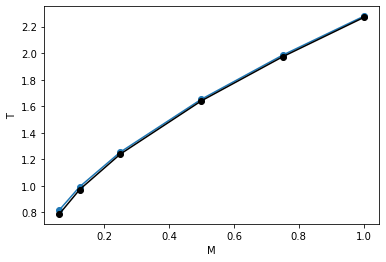

In [75]:
plt.figure(facecolor='white')
plt.plot(ms[1:-1], ts_diff['mean'], marker='o')
plt.plot(ms[1:-1], [get_crit_T[Jd] for Jd in ms[1:-1]], marker='o', color='black')
#plt.axhline(y=T_c, linestyle='--', color='black')
plt.xlabel('M')
plt.ylabel('T')
plt.savefig('images/ts_m.png')

In [76]:
ms

[0.0004, 0.0625, 0.125, 0.25, 0.5, 0.75, 1.0, 1.5]

In [15]:
ts_diff

{'min': [0.8095792241934794,
  0.9874960336985028,
  1.2481686608481022,
  1.6440482329587889,
  1.9758677913444247,
  2.2722156172432757],
 'max': [0.8277610423752977,
  0.999617245819715,
  1.2602898729693144,
  1.662230051140607,
  1.9940496095262428,
  2.284336829364488],
 'mean': [0.8186701332843885,
  0.9935566397591089,
  1.2542292669087083,
  1.653139142049698,
  1.9849587004353337,
  2.278276223303882],
 'T_c': [0.7883671029813581,
  0.9723445185469877,
  1.2390777517571931,
  1.6410179299284857,
  1.9728374883141215,
  2.2691853142129728],
 'diff': [0.030303030303030387,
  0.021212121212121238,
  0.015151515151515138,
  0.0121212121212122,
  0.0121212121212122,
  0.00909090909090926],
 'ts': {0.0625: array([0.80957922, 0.81563983, 0.82776104, 0.82170044, 0.81563983]),
  0.125: array([0.99961725, 0.99355664, 0.99355664, 0.99355664, 0.98749603]),
  0.25: array([1.26028987, 1.24816866, 1.24816866, 1.25422927, 1.24816866]),
  0.5: array([1.66223005, 1.65010884, 1.64404823, 1.6501

In [11]:
ts_diff_rel = [ts_diff['diff'][i] / ts_diff['T_c'][i] for i in range(len(ts_diff['diff']))]


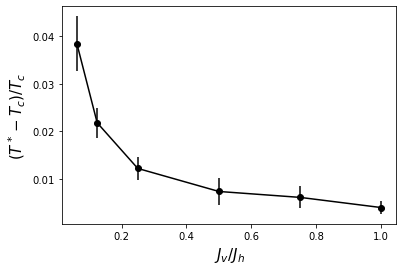

In [12]:
yerrs = np.array([(np.array(ts_diff['max'][i]) - np.array(ts_diff['mean'][i]))/2/ts_diff['T_c'][i] for i in range(len(ts_diff['diff']))])
plt.errorbar(ms[1:-1], ts_diff_rel, yerr=yerrs, marker='o', color='black')
plt.xlabel('$J_v/J_h$', fontsize=15)
plt.ylabel('$(T^* - T_c)/T_c$', fontsize=15)
# plt.xlim([0, 1.1])
# plt.ylim([0, 0.05])
plt.savefig('images/ts_diff_m.png')

In [143]:
T[1] - T[0]

0.0060606060606061

$T^*=T_c+\frac{A}{L^a}$ 

In [40]:
t_star = [0.8135, 0.9891, 1.2507, 1.6463, 1.9774, 2.2754]
t_star_diff = [(t_star[i] - ts_diff['T_c'][i]) / ts_diff['T_c'][i] for i in range(len(ts_diff['diff']))]
yerrs = [5e-4, 4e-4, 3e-4, 4e-4, 5e-4, 8e-4]

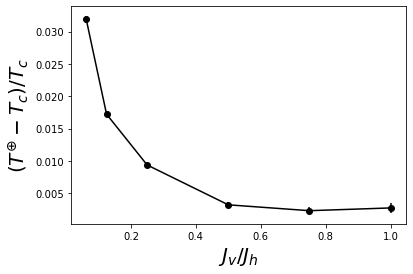

In [51]:
#yerrs = np.array([(np.array(ts_diff['max'][i]) - np.array(ts_diff['mean'][i]))/2/ts_diff['T_c'][i] for i in range(len(ts_diff['diff']))])
plt.errorbar(ms[1:-1], t_star_diff, yerr=yerrs, marker='o', color='black')
plt.xlabel('$J_v/J_h$', fontsize=20)
plt.ylabel('$(T^{\oplus} - T_c)/T_c$', fontsize=20)
# plt.xlim([0, 1.1])
# plt.ylim([0, 0.05])

plt.savefig('images/ts_star_diff_m.png')

$\triangle$